<a href="https://colab.research.google.com/github/iamwendellbalagot/google-colab/blob/master/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

plt.style.use('ggplot')
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [78]:
X, y = make_blobs(1000, 2, 5)
X.shape

(1000, 2)

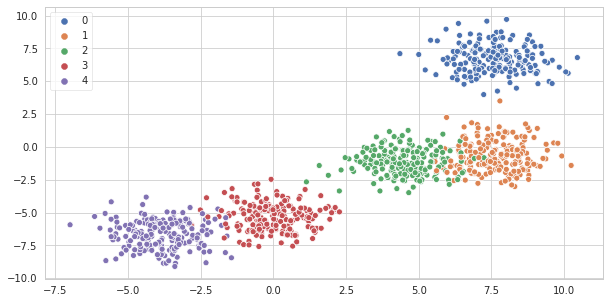

In [79]:
plt.figure(figsize=(10,5))
sns.scatterplot(X[:,0], X[:,1], hue=y, palette='deep');

In [80]:
kmeans = KMeans(n_clusters=5, init='random')
y_pred = kmeans.fit_predict(X)

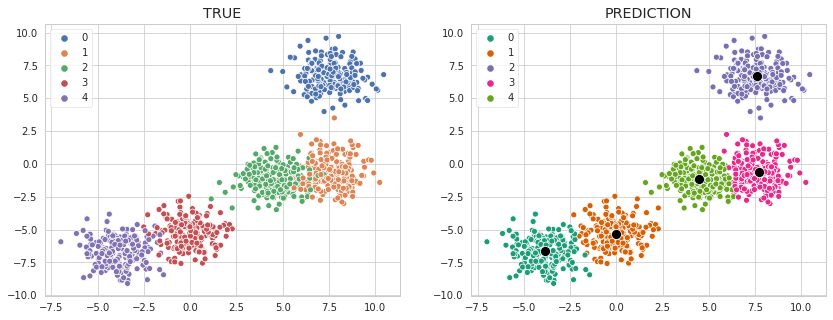

In [81]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.scatterplot(X[:,0], X[:,1], hue=y, palette='deep', ax=ax[0]).set_title('TRUE')
sns.scatterplot(X[:,0], X[:,1], hue=y_pred, palette='Dark2', ax=ax[1]).set_title('PREDICTION');
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', s=100, ax=ax[1])

In [82]:
print(kmeans.inertia_)
print(kmeans.score(X))

1935.37001616233
-1935.3700161623287


In [83]:
from sklearn.metrics import silhouette_score

sh_scores = []

for k in range(2,10):
  km = KMeans(n_clusters=k)
  pred= km.fit_predict(X)
  sh_scores.append(silhouette_score(X, km.labels_))

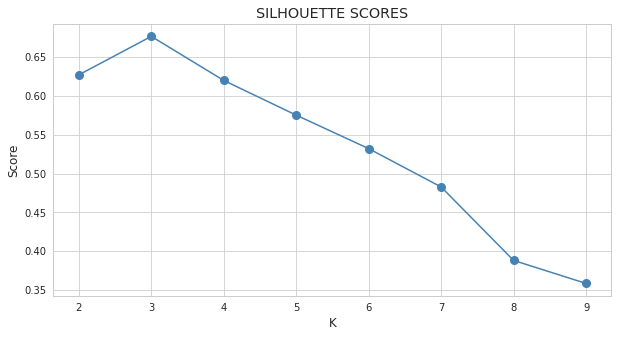

In [84]:
plt.figure(figsize=(10,5))
plt.title('SILHOUETTE SCORES')
plt.xlabel('K')
plt.ylabel('Score')
plt.plot(np.arange(2,10), sh_scores, color='steelblue', marker='o', markersize=8);

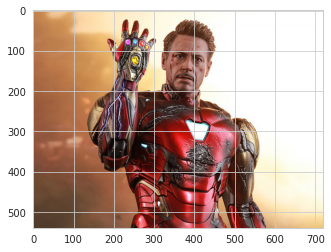

In [85]:
from matplotlib.image import imread
img = imread('iron.jpg')
plt.imshow(img);

In [86]:
img_res = img.reshape(-1,3)
kmeans = KMeans(n_clusters=3).fit(img_res)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(img.shape)

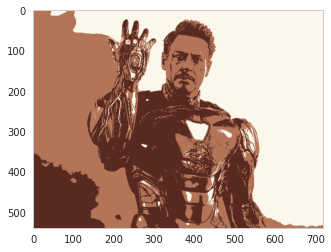

In [87]:
plt.grid()
plt.imshow(segmented_img/255);

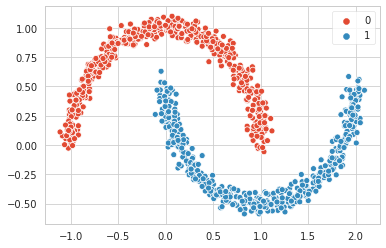

In [90]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(1000, noise=0.05)
sns.scatterplot(X[:,0], X[:,1], hue=y);

In [91]:
dbscan = DBSCAN(0.05, min_samples=5).fit(X)

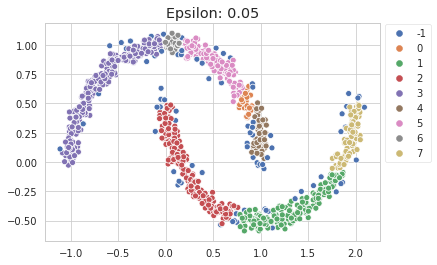

In [100]:
plt.title('Epsilon: 0.05')
sns.scatterplot(X[:,0], X[:,1], hue=dbscan.labels_, palette='deep');
plt.legend(bbox_to_anchor=(1, 1.02));

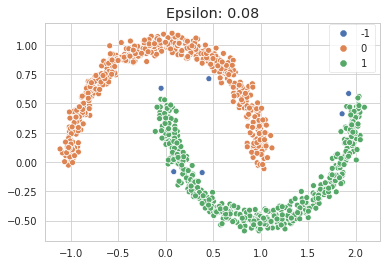

In [123]:
dbscan = DBSCAN(0.08, min_samples=5).fit(X)
plt.title('Epsilon: 0.08')
sns.scatterplot(X[:,0], X[:,1], hue=dbscan.labels_, palette='deep');
plt.legend(bbox_to_anchor=(1, 1.02));

In [130]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
print('Accuracy: ', accuracy_score(dbscan.labels_[dbscan.core_sample_indices_],
                                   knn.predict(dbscan.components_)))



Accuracy:  1.0


In [131]:
X_new = np.array([[-1, -0.25], [-0.5, 0.75], [1.5, 0], [2, 0.5]])
knn.predict_proba(X_new)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [147]:
y_dist, y_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_idx]
y_pred[y_dist >0.08] = -1
y_pred

array([[-1],
       [ 0],
       [-1],
       [ 1]])

In [146]:
y_dist>0.08

array([[ True],
       [False],
       [ True],
       [False]])

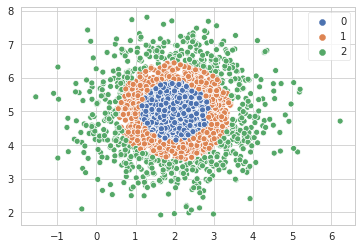

In [160]:
from sklearn.datasets import make_gaussian_quantiles
a, b = make_gaussian_quantiles([2,5], n_samples=2000, cov=1)
sns.scatterplot(a[:,0], a[:,1], hue=b, palette='deep')